In [70]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

In [3]:
df = pd.read_csv("C:/Users/arela/Downloads/StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [56]:
df['gender'] = df['gender'].astype('category')
df['race/ethnicity'] = df['race/ethnicity'].astype('category')
df['parental level of education'] = df['parental level of education'].astype('category')
df['lunch'] = df['lunch'].astype('category')
df['test preparation course'] = df['test preparation course'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       1000 non-null   category
 1   race/ethnicity               1000 non-null   category
 2   parental level of education  1000 non-null   category
 3   lunch                        1000 non-null   category
 4   test preparation course      1000 non-null   category
 5   math score                   1000 non-null   int64   
 6   reading score                1000 non-null   int64   
 7   writing score                1000 non-null   int64   
dtypes: category(5), int64(3)
memory usage: 29.2 KB


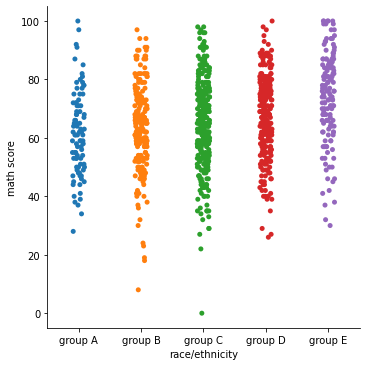

In [57]:
p = sns.catplot(x="race/ethnicity", y="math score", data=df)

Text(0.5, 1.0, 'Bar Plot Tingginya Pendidikan Orangtua')

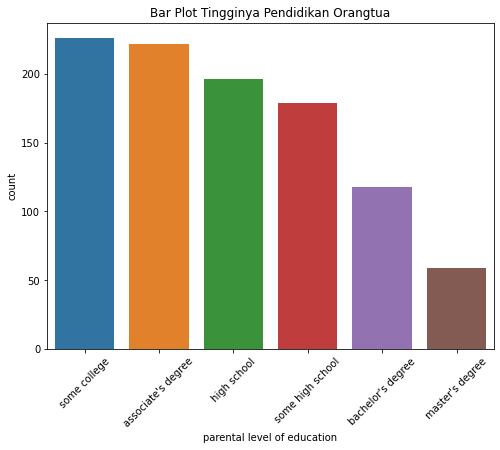

In [59]:
plt.figure(figsize=(8,6)) 
p = sns.countplot(x="parental level of education", data=df, order = df['parental level of education'].value_counts().index)
plt.xticks(rotation ='45')
plt.title('Bar Plot Tingginya Pendidikan Orangtua')

C:\Users\arela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\arela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\arela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


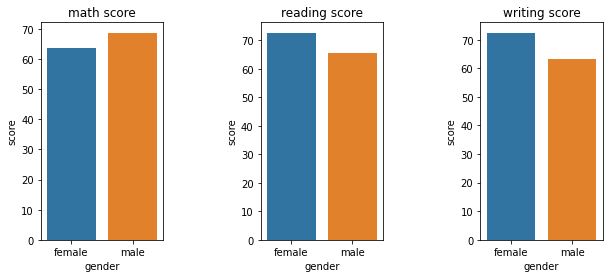

In [63]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = df.groupby("gender")[list(df.columns[-3:])[idx]].describe()
    sns.barplot(gender_df.index, gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(df.columns[-3:])[idx])
    
plt.show()

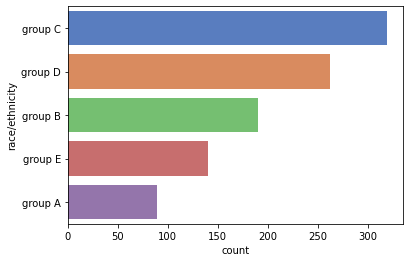

In [65]:
 p= sns.countplot(y = 'race/ethnicity', palette = 'muted', data=df,order = df['race/ethnicity'].value_counts().index)

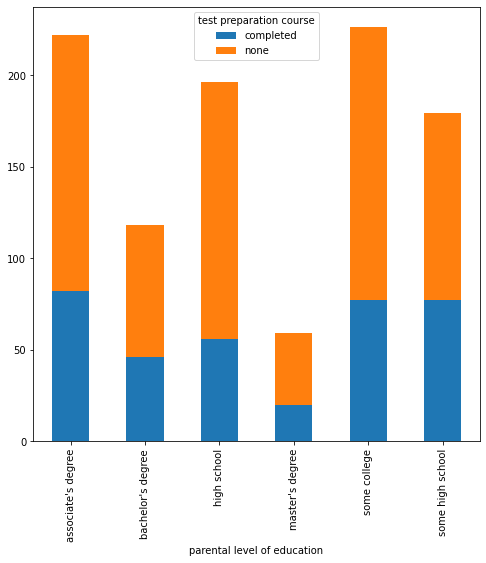

In [66]:
CT = pd.crosstab(index=df["parental level of education"], columns=df["test preparation course"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

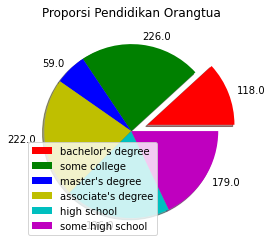

In [75]:
parents = df['parental level of education']

proporsion = Counter(parents)
values = [float(v) for v in proporsion.values()]
colors = ['r', 'g', 'b', 'y', 'c', 'm']
labels = proporsion.keys()
explode = (0.2, 0, 0, 0, 0, 0)
plt.pie(values, colors=colors, labels= values, explode=explode, shadow=True)
plt.title('Proporsi Pendidikan Orangtua')
plt.legend(labels,loc='best')
plt.show()

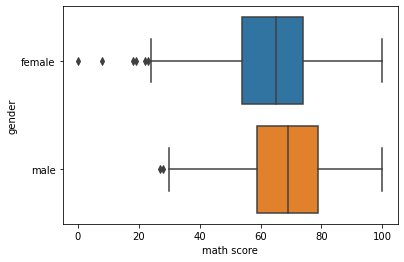

In [80]:
p = sns.boxplot(x="math score", y="gender", data=df)

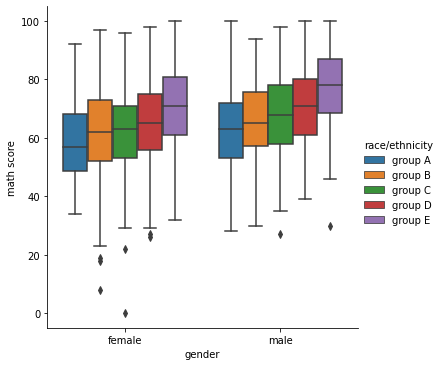

In [78]:
p = sns.catplot(x="gender", y="math score", hue="race/ethnicity", kind="box", data=df)

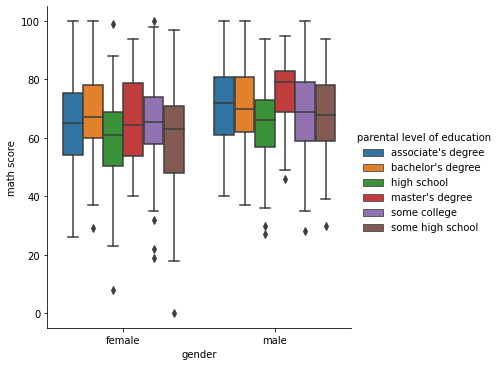

In [79]:
p = sns.catplot(x="gender", y="math score", hue="parental level of education", kind="box", data=df)

C:\Users\arela\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\arela\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


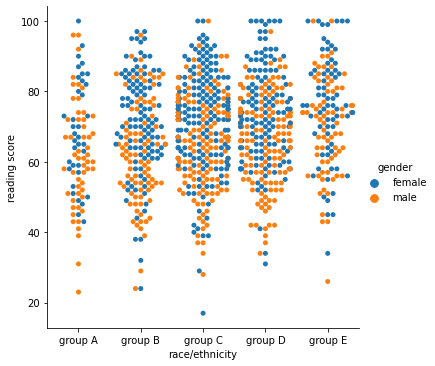

In [82]:
p= sns.catplot(x="race/ethnicity", y="reading score", hue="gender", kind="swarm", data=df)

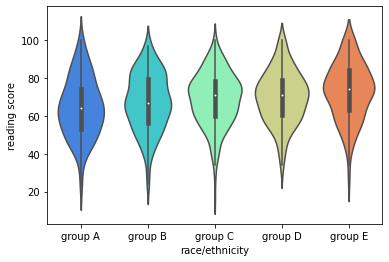

In [83]:
p = sns.violinplot(x="race/ethnicity", y="reading score", data=df,palette='rainbow')

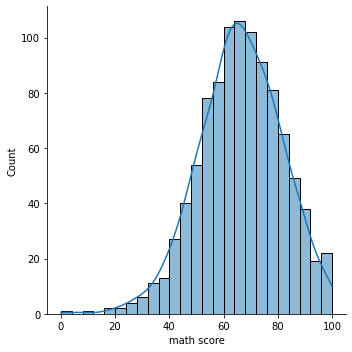

In [85]:
plot = sns.displot(data=df, x='math score', kde=True)

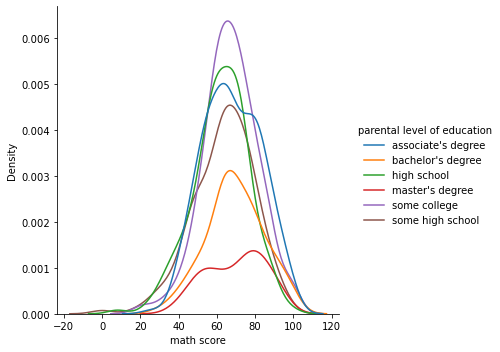

In [86]:
plot = sns.displot(data=df, x='math score', hue='parental level of education', kind="kde")

array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>,
        <AxesSubplot:title={'center':'writing score'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

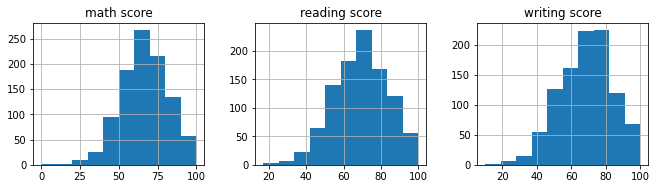

In [87]:
numerical = df.select_dtypes(include = ['int64','float64']).columns

df[numerical].hist(figsize=(15, 6), layout=(2, 4))

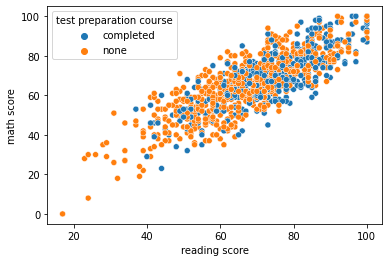

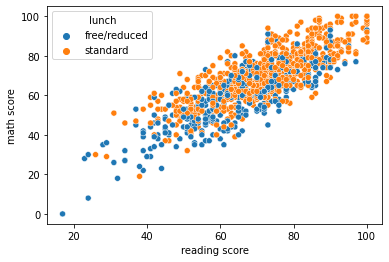

In [98]:
plot1 = plt.figure(1)
p = sns.scatterplot(x=df['reading score'], y=df['math score'], hue=df['test preparation course'])
plot2 = plt.figure(2)
q = sns.scatterplot(x=df['reading score'], y=df['math score'], hue=df['lunch'])
plt.show()

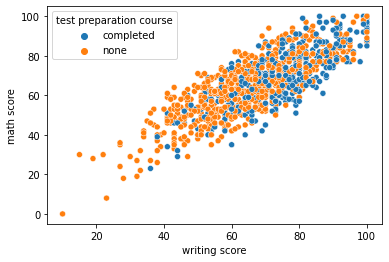

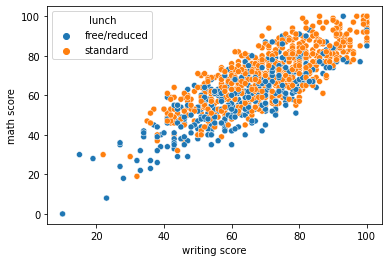

In [99]:
plot1 = plt.figure(1)
p = sns.scatterplot(x=df['writing score'], y=df['math score'], hue=df['test preparation course'])
plot2 = plt.figure(2)
q = sns.scatterplot(x=df['writing score'], y=df['math score'], hue=df['lunch'])
plt.show()

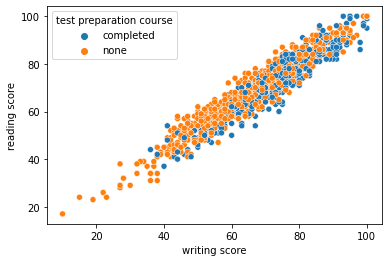

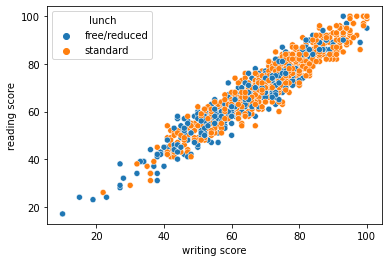

In [100]:
plot1 = plt.figure(1)
p = sns.scatterplot(x=df['writing score'], y=df['reading score'], hue=df['test preparation course'])
plot2 = plt.figure(2)
q = sns.scatterplot(x=df['writing score'], y=df['reading score'], hue=df['lunch'])
plt.show()

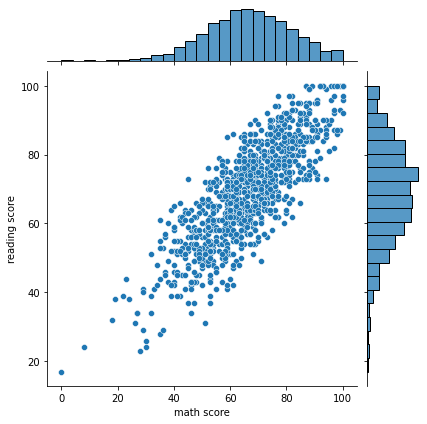

In [101]:
p = sns.jointplot(x=df['math score'], y=df['reading score'])

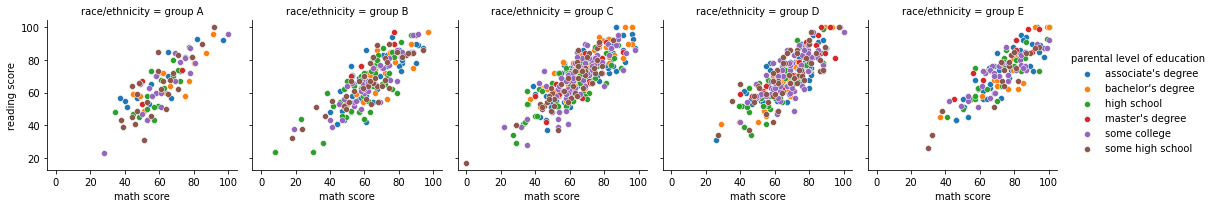

In [103]:
cond_plot = sns.FacetGrid(data=df, col='race/ethnicity', hue='parental level of education')
p = cond_plot.map(sns.scatterplot, 'math score', 'reading score').add_legend()

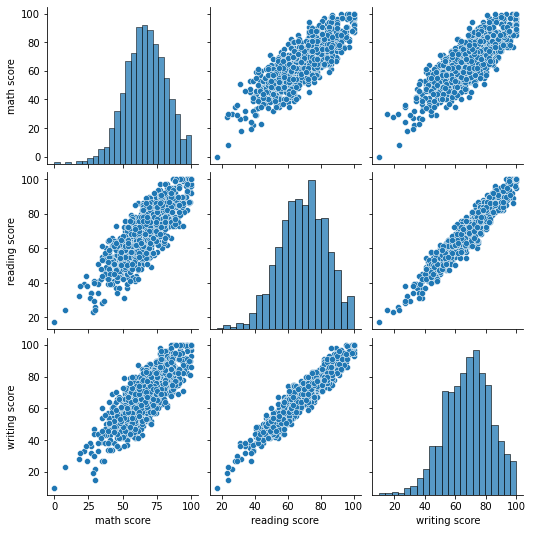

In [108]:
sns.pairplot(df)

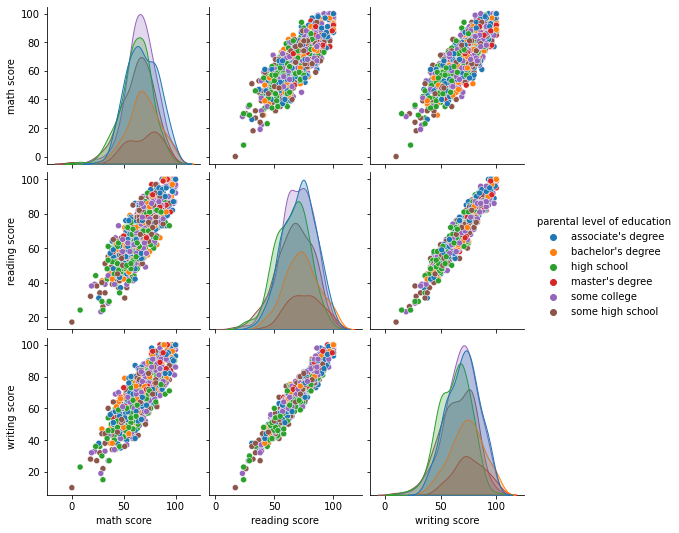

In [113]:
p = sns.pairplot(df, hue="parental level of education")

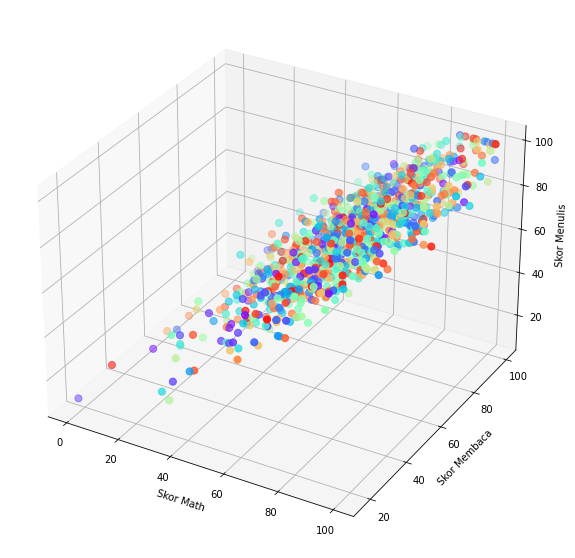

In [120]:
%matplotlib inline
from matplotlib import cm

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
x = df['math score']
y = df['reading score']
z = df['writing score']
warna = cm.rainbow(np.linspace(0, 1, len(y)))

ax.scatter(x, y, z, s=50, c=warna, marker='o')
ax.set_xlabel('Skor Math')
ax.set_ylabel('Skor Membaca')
ax.set_zlabel('Skor Menulis')
plt.show()

In [132]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


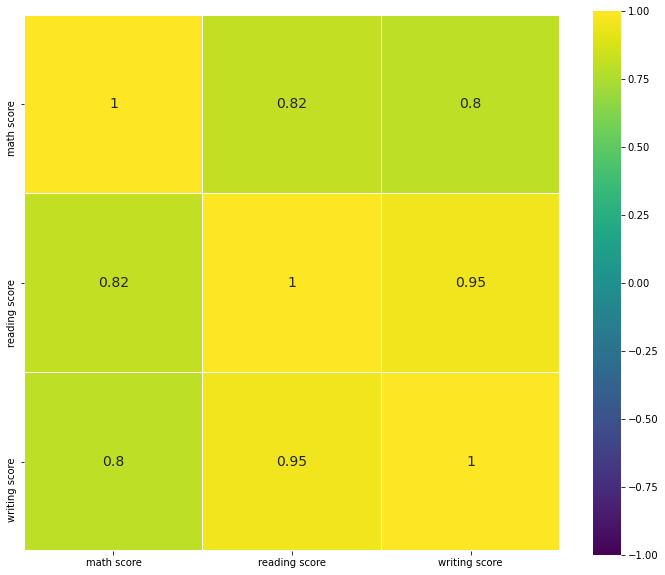

In [133]:
corr2 = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);